## Author : Riasad Alvi
### 12 Jan 2025

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [4]:
# Creating a NumPy array with 20 values evenly spaced between -1 and 1
X_train = np.linspace(-1, 1, 20)


In [5]:
# Creating a NumPy array for the target variable (y_train) with specific values
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285, 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])


In [6]:
# Creating a NumPy array with 20 values evenly spaced between -1 and 1 for the test data
X_test = np.linspace(-1, 1, 20)


In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

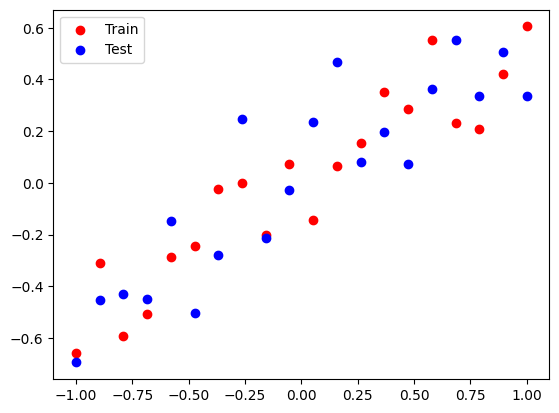

In [8]:
# Creating a scatter plot for the training data (X_train, y_train) with red points
plt.scatter(X_train, y_train, c='red', label='Train')

# Creating a scatter plot for the test data (X_test, y_test) with blue points
plt.scatter(X_test, y_test, c='blue', label='Test')

# Adding a legend to differentiate the training and test data points
plt.legend()

# Displaying the plot
plt.show()


# Regression Model

In [9]:
# Importing the Sequential model from Keras to build a neural network
model_1 = Sequential()

# Adding the first Dense (fully connected) layer with 128 units, input dimension of 1, and ReLU activation function
model_1.add(Dense(128, input_dim=1, activation="relu"))

# Adding the second Dense layer with 128 units and ReLU activation function
model_1.add(Dense(128, activation="relu"))

# Adding the output layer with 1 unit and a linear activation function (typically used for regression tasks)
model_1.add(Dense(1, activation="linear"))

# Defining the Adam optimizer with a learning rate of 0.01
adam = Adam(learning_rate=0.01)

# Compiling the model with Mean Squared Error (MSE) as the loss function, Adam optimizer, and MSE as the metric
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])

# Fitting the model on the training data (X_train, y_train) for 500 epochs
# It also validates on the test data (X_test, y_test) during training and suppresses verbose output
history = model_1.fit(X_train, y_train, epochs=500, 
                      validation_data=(X_test, y_test),
                      verbose=False)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Evaluating the model on the training data (X_train, y_train) to calculate the Mean Squared Error (MSE)
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)

# Evaluating the model on the test data (X_test, y_test) to calculate the Mean Squared Error (MSE)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)

# Printing the MSE for both the training and test datasets
print('Train: {}, Test: {}'.format(train_mse, test_mse))


Train: 0.0017761330818757415, Test: 0.0449739508330822


In [11]:
# Using the trained model (model_1) to make predictions on the test data (X_test)
y_pred_1 = model_1.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


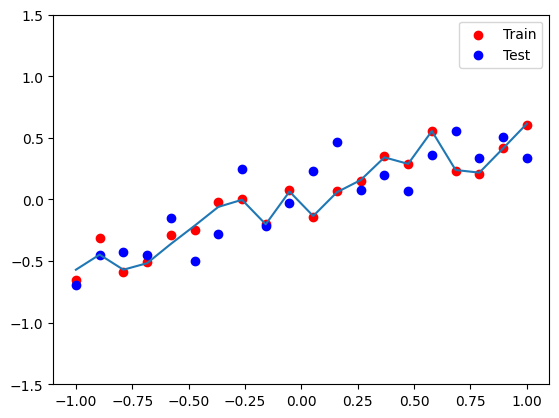

In [12]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Adding Dropout to the model : 

In [13]:
# Initializing a new Sequential model for model_2
model_2 = Sequential()

# Adding the first Dense (fully connected) layer with 128 units, input dimension of 1, and ReLU activation function
model_2.add(Dense(128, input_dim=1, activation="relu"))

# Adding a Dropout layer with a dropout rate of 0.2 to prevent overfitting
model_2.add(Dropout(0.2))

# Adding the second Dense layer with 128 units and ReLU activation function
model_2.add(Dense(128, activation="relu"))

# Adding another Dropout layer with a dropout rate of 0.2
model_2.add(Dropout(0.2))

# Adding the output layer with 1 unit and a linear activation function (typically used for regression tasks)
model_2.add(Dense(1, activation="linear"))

# Defining the Adam optimizer with a learning rate of 0.01
adam = Adam(learning_rate=0.01)

# Compiling the model with Mean Squared Error (MSE) as the loss function, Adam optimizer, and MSE as the metric
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

# Fitting the model on the training data (X_train, y_train) for 500 epochs
# It also validates on the test data (X_test, y_test) during training and suppresses verbose output
drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                                validation_data=(X_test, y_test),
                                verbose=False)


In [14]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010461597703397274, Test: 0.03966100513935089


In [15]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


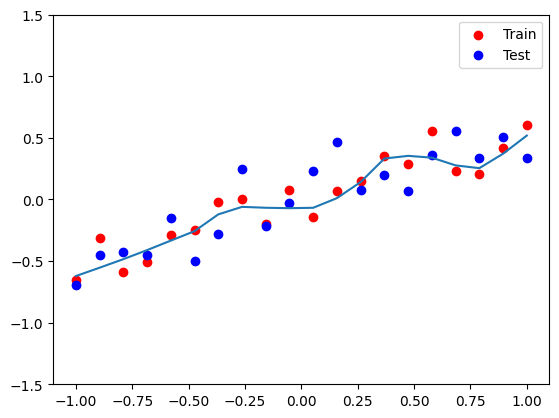

In [16]:
# Creating a new figure for plotting
plt.figure()

# Plotting the training data (X_train, y_train) as red points
plt.scatter(X_train, y_train, c='red', label='Train')

# Plotting the test data (X_test, y_test) as blue points
plt.scatter(X_test, y_test, c='blue', label='Test')

# Plotting the predictions (y_pred_2) as a line over the test data (X_test)
plt.plot(X_test, y_pred_2)

# Adding a legend to the plot to distinguish between train, test, and predicted values
plt.legend()

# Setting the y-axis limits to range from -1.5 to 1.5
plt.ylim((-1.5, 1.5))

# Displaying the plot
plt.show()


# After adding dropout the prediction line became smooth and less prone to overfitting 